# Chapter14 例題
資工二 111210520 吳佳泰

## Q1.OpenCV 顯示圖形
以OpenCV 讀取圖形檔，並以彩色及灰階模式顯示。(使用[picture1.png](picture1.png)圖片來實作)

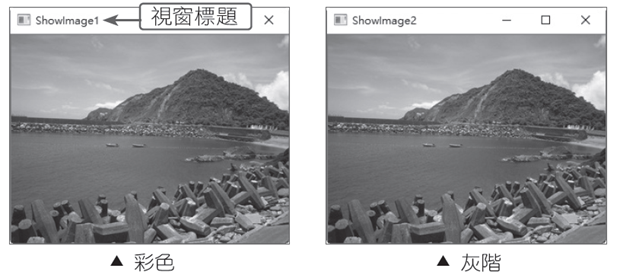

In [ ]:
import cv2

image1 = cv2.imread("picture1.png" , cv2.IMREAD_COLOR)
image2 = cv2.imread("picture1.png" , cv2.IMREAD_GRAYSCALE)

cv2.namedWindow("ShowImage1" , cv2.WINDOW_NORMAL)
cv2.imshow("ShowImage1", image1)

cv2.namedWindow("ShowImage2" , cv2.WINDOW_NORMAL)
cv2.imshow("ShowImage2", image2)

cv2.waitKey(0)
cv2.destroyAllWindows()

---

## Q2.OpenCV 儲存圖形檔
以 OpenCV 讀取圖形檔後以不同圖片品質儲存。(使用[picture2.jpg](picture2.jpg)圖片來實作)

In [ ]:
import cv2

cv2.namedWindow("showImage" , cv2.WINDOW_NORMAL)
image1 = cv2.imread("picture2.jpg" , cv2.IMREAD_COLOR)
cv2.imshow("showImage" , image1)
cv2.imwrite("picture2_copy1.jpg" , image1)
cv2.imwrite("picture2_copy2.jpg" , image1 , [int(cv2.IMWRITE_JPEG_QUALITY) , 50])
cv2.waitKey(0)
cv2.destroyAllWindows()

---

## Q3.OpenCV 基本繪圖
以OpenCV 基本繪圖繪製各種圖形及顯示文字。(使用[picture1.png](picture1.png)圖片來實作)

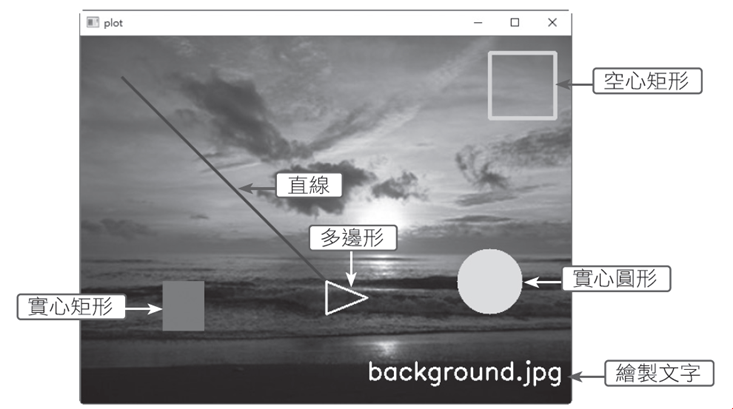

In [1]:
import cv2
import numpy

cv2.namedWindow("plot" , cv2.WINDOW_NORMAL)
image1 = cv2.imread("picture1.png" , cv2.IMREAD_COLOR)

cv2.line(image1 , (10,10) , (100,100) , (0,0,0) , 2)
cv2.rectangle(image1 , (110,50) , (300,100) , (100,50,50) , -1)
cv2.circle(image1 , (700,700) , 100 , (150,350,50) , -1)
plot = numpy.array([[500, 100], [600, 200], [500, 400]] , numpy.int32)
cv2.polylines(image1 , [plot] , True , (0,0,255) , 3)
cv2.putText(image1 , "Image create by Abao" , (10,500) , cv2.FONT_HERSHEY_SCRIPT_SIMPLEX , 5 , (0,0,0) , 2)

cv2.imshow("plot" , image1)
cv2.waitKey(0)
cv2.destroyAllWindows()

---

## Q4.標示臉部位置
標示出圖片中臉部位置，並在左下角顯示辨識出臉部的數量。(使用[picture3.jpg](picture3.jpg)圖片來實作)

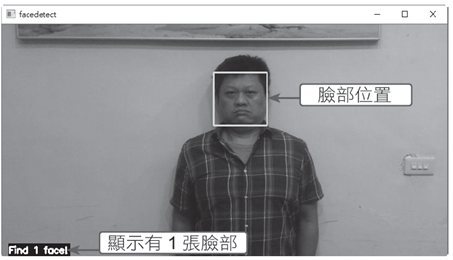

In [15]:
import cv2

face = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
image1 = cv2.imread("picture3.jpg" , cv2.IMREAD_ANYCOLOR)
detect = face.detectMultiScale(image1 , scaleFactor=1.1 , minNeighbors=5 , minSize=(30,30) , flags=cv2.CASCADE_SCALE_IMAGE)

cv2.rectangle(image1 , (10,image1.shape[0]-60) , (600,image1.shape[0]) , (0,0,0) , -1)
cv2.putText(image1 , ("Find " + str(len(detect)) + " face!") , (10,image1.shape[0]-5) , cv2.FONT_HERSHEY_COMPLEX , 2 , (255,255,255) , 2)

for x,y,w,h in detect:
    cv2.rectangle(image1 , (x,y) , (x+w,y+h) , (128,255,0) , 2)

cv2.namedWindow("facedetect" , cv2.WINDOW_NORMAL)
cv2.resizeWindow("facedetect", 900, 600)
cv2.imshow("facedetect" , image1)
cv2.waitKey(0)
cv2.destroyAllWindows()

---

## Q5.擷取臉部及存檔
使用OpenCV 取得臉部區域後，擷取臉部圖形並存檔。(使用[picture3.jpg](picture3.jpg)圖片來實作)

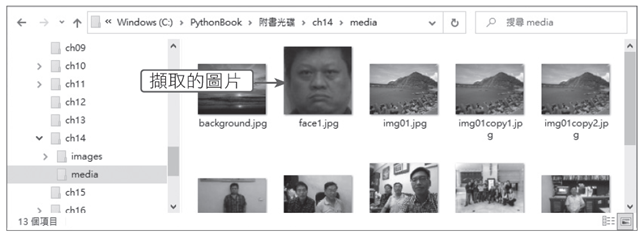

In [21]:
import os
import shutil
from time import sleep
import cv2

if (os.path.isdir("face_delect")):
    shutil.rmtree("face_delect")
    sleep(1)   
os.mkdir("face_delect")

face = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
image1 = cv2.imread("picture3.jpg" , cv2.IMREAD_ANYCOLOR)
detect = face.detectMultiScale(image1 , scaleFactor=1.1 , minNeighbors=5 , minSize=(30,30) , flags=cv2.CASCADE_SCALE_IMAGE)

counter = 1
for x,y,w,h in detect:
    cv2.rectangle(image1 , (x,y) , (x+w,y+h) , (128,255,0) , 2)
    filename = "face_delect\\face_delect" + str(counter) + ".jpg"
    image2 = image1[y:y+h, x:x+w]
    image3 = cv2.resize(image2 , (400,400))
    cv2.imwrite(filename , image3)
    counter += 1

cv2.namedWindow("facedetect" , cv2.WINDOW_NORMAL)
cv2.resizeWindow("facedetect", 900, 600)
cv2.imshow("facedetect" , image1)
cv2.waitKey(0)
cv2.destroyAllWindows()

---

## Q6.擷取攝影機靜態影像
程式執行後會自動開啟攝影機，使用者按「z」鍵就會擷取影像存檔。

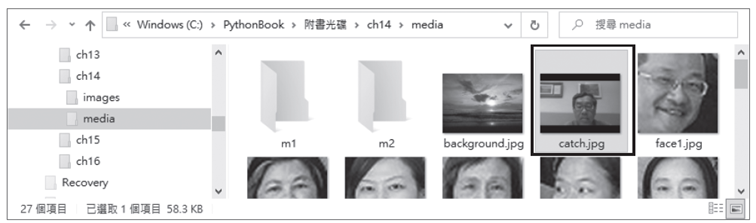

In [23]:
import cv2

cv2.namedWindow("frame")
camera = cv2.VideoCapture(0)

while (camera.isOpened() == True):
    read,photo = camera.read()

    if (read == True):
        cv2.imshow("frame" , photo)
        z = cv2.waitKey(100)

        if ((ord("z") == z) or (ord("Z") == z)):
            cv2.imwrite("self-photo.png" , photo)
            break

camera.release()
cv2.destroyAllWindows()

---

## Q7.建立會員臉部模型
* ### 蒐集個人臉部圖片
    建立個人臉部模型時需要若干張個人臉部圖片，圖片越多辨識效果越好，但模型檔案越大。要如何取得個人臉部圖片呢？最簡單的方法是以攝影機擷取相片，可以在極短時間內就蒐集到大量的個人臉部圖片。
    
<br>

* ### 訓練模型
    有了臉部圖片後就可進行訓練了！由於圖形標記只能使用數值( 會員編號索引)，因此必須建立會員編號索引及會員姓名對照表，並且儲存，將來臉部辨識後才能取得該人臉擁有者的姓名。本專題為簡化程式，將會員姓名存於文字檔。


In [14]:
import os
import shutil
import cv2
from tqdm import tqdm
import glob
import numpy
from time import sleep

# 蒐集照片
name = input("請輸入您的英文姓名 : ")
index = 1
total = 100

# 請先建立一個member_model的資料夾

if (os.path.isdir("member_model\\" + name)):
    print("此姓名已存在")
else:
    print("開始取樣")
    print("取樣中，請稍候...")

    os.makedirs("member_model\\" + name)
    face = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    camera = cv2.VideoCapture(0)
    cv2.namedWindow("video" , cv2.WINDOW_NORMAL)
    
    with tqdm(total=total, desc="進度") as pbar:
        while (index > 0):
            read,photo = camera.read()
            photo = cv2.flip(photo , 1)
            gray = cv2.cvtColor(photo , cv2.COLOR_BGR2GRAY)
            detect = face.detectMultiScale(gray , scaleFactor=1.1 , minNeighbors=3)

            for x,y,w,h in detect:
                photo = cv2.rectangle(photo , (x,y) , (x+w,y+h) , (0,255,0) , 3)
                image1 = cv2.resize(gray[y:y+h , x:x+w] , (400,400))
                cv2.imwrite(("member_model\\" + name + "\\" +str(index) + ".jpg") , image1)
                sleep(0.1)
                index += 1
                pbar.update(1)

                if (index > total):
                    print("取樣完成!")
                    index = -1
                    break

            cv2.imshow("video" , photo)
            cv2.waitKey(1)

camera.release()
cv2.destroyAllWindows()

# 訓練模型
photos = []
labels = []
name_list = []
count = 0
folder = os.listdir("member_model")

for i in folder:
    if (os.path.isdir("member_model/" + i)):
        file = glob.glob("member_model/" + i + "/*.jpg")

        for filename in file:
            image2 = cv2.imread(filename , cv2.COLOR_BGR2GRAY)
            photos.append(image2)
            labels.append(count)
        
        name_list.append(i)
        count += 1

f = open("member.txt" , "w")
f.write(",".join(name_list))
f.close()

print("開始建立模型")
print("模型建立中，請稍候...")
model = cv2.face.LBPHFaceRecognizer_create()
model.train(numpy.asarray(photos) , numpy.asarray(labels))
model.save("faces_LBPH.yml")
print("模型建立完成!")


開始取樣
取樣中，請稍候...


進度: 100%|██████████| 100/100 [00:14<00:00,  7.13it/s]


取樣完成!
開始建立模型
模型建立中，請稍候...
模型建立完成!


---

## Q8.臉部辨識登入系統
* ### 取得使用者圖片
    本專題使用攝影機來擷取使用者圖片：攝影機啟動後會顯示倒數5秒數字，使用者可以在5秒內按「z」鍵進行拍攝，若使用者未按鍵， 5秒後系統將自動拍攝。  
      
<br>
      
* ### 進行臉部辨識登入
    載入模型並取得使用者圖片後，就可進行臉部辨識判斷是否允許登入了！
    程式執行後會啟動攝影機並在圖片上顯示倒數5 秒數字，使用者可以在5秒內按「z」鍵進行拍攝，若使用者未按鍵， 5秒後會自動拍攝。拍攝後就進行臉部辨識，並依辨識結果顯示訊息。
    
<br>

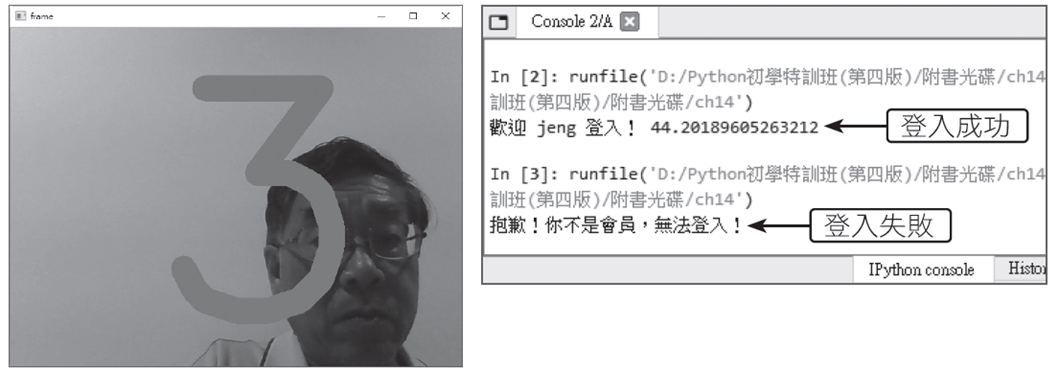

In [17]:
import os
import shutil
import cv2
import time

if (os.path.isdir("media")):
    shutil.rmtree("media")
    sleep(1)   
os.mkdir("media")

# 取得使用者圖片
model = cv2.face.LBPHFaceRecognizer_create()
model.read("faces_LBPH.yml")

f = open("member.txt" , "r")
name = f.readline().split(",")

face = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
camera = cv2.VideoCapture(0)
cv2.namedWindow("frame" , cv2.WINDOW_NORMAL)
now = time.time()

while (camera.isOpened() == True):
    counter = 5 - (int(time.time() - now))
    read,photo = camera.read()

    if (read == True):
        image3 = photo.copy()
        cv2.putText(image3 , str(counter) , (200,400) , cv2.FONT_HERSHEY_SCRIPT_SIMPLEX , 15 , (0,0,255) , 35)
        cv2.imshow("frame" , image3)

        z = cv2.waitKey(100)
        if ((z == ord("Z")) or (z == ord("z")) or (counter == 0)):
            cv2.imwrite("media/temp.jpg" , photo)
            break

camera.release()
cv2.destroyAllWindows()

# 進行臉部辨識登入
image4 = cv2.imread("media/temp.jpg")
gray = cv2.cvtColor(image4 , cv2.COLOR_BGR2GRAY)
detect = face.detectMultiScale(gray , scaleFactor=1.1 , minNeighbors=3)

for x,y,w,h in detect:
    image4 = cv2.rectangle(image4 , (x,y) , (x+w,y+h) , (0,255,0) , 3)
    image5 = cv2.resize(gray[y:y+h , x:x+w] , (400,400))

    try:
        quantity = model.predict(image5)

        if (quantity[1] > 50):
            print("歡迎會員" + str(name[quantity[0]]) + "登入! (照片符合率:" + str(quantity[1]) + ")")
        else:
            print("抱歉，您不是會員，無法登入! (照片符合率:" + str(quantity[1]) + ")")
    except:
        print("識別時發生錯誤!")

抱歉，您不是會員，無法登入! (照片符合率:27.28669020423274)
